In [3]:
# all positions mutated 

import pandas 

df = pandas.read_csv( 'data/clean/production.csv', index_col='mutant' )
df['pos'] = df.index.str[1:-1].astype( int )

print 'select muts, resi', '+'.join( df.pos.astype( str ) )

select muts, resi 195+500+466+500+167+167+403+154+164+164+164+177+177+177+222+222+222+222+222+222+353+406+406+423+415+415+72+355+101+119+119+119+178+178+315+315+373+379+379+244+244+300+91+341+171+171+362+221+261+323+323+358+163+163+163+220+220+220+220+220+293+293+293+293+354+404+404+329+19+19+19+313+240+240+240+240+76+14+16+16+17+17+298+331+400+15+175+218+296+352+52+120+120+120+325+325+325+325+325+325+34+399+399+399+399+399+407+407+407+407+409+274+166+18+294+294+295+295


![](img/all_positions.png)

In [13]:
! head -2 data/clean/new_production.csv

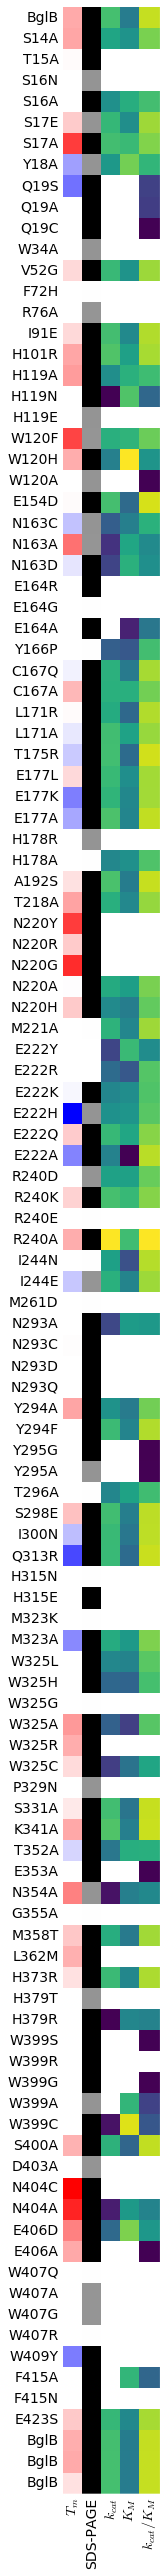

In [14]:
# heatmap 

%matplotlib inline 
import matplotlib.pyplot as plt 
import matplotlib.colors as mcolors
from matplotlib import rc 
from numpy import log
import pandas 

df = pandas.read_csv( 'data/clean/new_production.csv', index_col='mutant' )
plos = pandas.read_csv( 'data/clean/plos2015.csv', index_col='name' )
df = df.join( plos, rsuffix='plos_' ) 

df['norm_tm'] = df[ 'tm' ] - 39.5
df['norm_kcat'] = log( df[ 'kcat' ] / 880 ) - 1
df['norm_km'] = log( df[ 'km' ] / 0.05 ) - 1
df['norm_kcatkm'] = log( df[ 'kcatkm' ] / 174000 ) - 1
df['pos'] = df.index.str[1:-1].astype( int ) 
df = df.sort_values( by='pos' ) 

plt.figure( figsize=(18,36) ) 
plt.subplots_adjust(left=-11.8)
rc('axes', edgecolor='none')

font = { 'size': 14 }
rc('font', **font)

# recapitulate original heat map 

orig_cmap = mcolors.from_levels_and_colors(
    [0, 0.5, 1], 
    [(34,34,45,0.1), 'green']
)


# heat map columns 

plt.subplot( 1, 6, 1 )
plt.imshow( df[ ['norm_tm'] ], interpolation='none', cmap='bwr', origin='upper' ) 
plt.xticks( [ 0 ], [ '$T_m$' ], rotation='vertical' )
plt.yticks( range( len( df.index ) ), df.index )
plt.tick_params( length=0 ) 

plt.subplot( 1, 6, 2 )
plt.imshow( df[ ['protein_on_gel'] ], interpolation='none', cmap='Greys' ) 
plt.tick_params( length=0 ) 
plt.xticks( [ 0 ], [ 'SDS-PAGE' ], rotation='vertical' ); plt.yticks( [] ) 

plt.subplot( 1, 6, 3 )
plt.imshow( df[ ['norm_kcat'] ], interpolation='none', cmap='viridis' ) 
plt.xticks( [ 0 ], [ '$k_{cat}$' ], rotation='vertical' ); plt.yticks( [] ) 
plt.tick_params( length=0 ) 

plt.subplot( 1, 6, 4 )
plt.imshow( df[ ['norm_km'] ], interpolation='none', cmap='viridis' ) 
plt.xticks( [ 0 ], [ '$K_M$' ], rotation='vertical' ); plt.yticks( [] ) 
plt.tick_params( length=0 ) 

plt.subplot( 1, 6, 5 )
plt.imshow( df[ ['norm_kcatkm'] ], interpolation='none', cmap='viridis' ) 
plt.xticks( [ 0 ], [ '$k_{cat}/K_M$' ], rotation='vertical' ); plt.yticks( [] ) 
plt.tick_params( length=0 ) 

#plt.subplot( 1, 6, 6 )
#plt.scatter( 0, 0 ) 
#plt.xticks( [ 0 ], [ '$k_{cat}/K_M$' ], rotation='vertical' ); plt.yticks( [] ) 
#plt.tick_params( length=0 ) 

plt.tight_layout()
plt.savefig( 'fig2/plt_out.png', dpi=300 ) 
plt.show() 

#SS16A is duplictaed
#

ERROR: Line magic function `%matplotlibinline` not found.


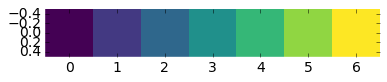

In [15]:
# legends 

import numpy as np
import matplotlib.pyplot as plt
%matplotlibinline 

legend_data = np.array([[ -5,-4,-3,-2,-1,0,1 ]])
plt.imshow( legend_data, cmap='viridis', interpolation='none' )
#plt.xticks( [] )
#plt.yticks( [] )


ERROR: Line magic function `%matplotlibinline` not found.


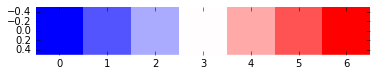

In [21]:
# legends 

import numpy as np
import matplotlib.pyplot as plt
%matplotlibinline 

legend_data = np.array([[ -3,-2,-1,0,1,2,3 ]])
plt.imshow( legend_data, cmap='bwr', interpolation='none' )
#plt.xticks( [] )
#plt.yticks( [] )


ERROR: Line magic function `%matplotlibinline` not found.


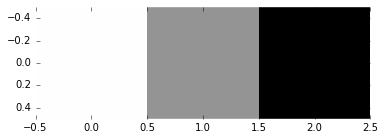

In [24]:
# legends 

import numpy as np
import matplotlib.pyplot as plt
%matplotlibinline 

legend_data = np.array([[ 1,2,3 ]])
plt.imshow( legend_data, cmap='Greys', interpolation='none' )
#plt.xticks( [] )
#plt.yticks( [] )

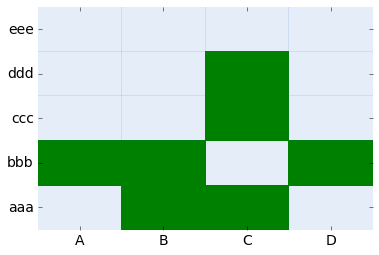

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors



Index= ['aaa', 'bbb', 'ccc', 'ddd', 'eee']
Cols = ['A', 'B', 'C', 'D']
data= np.random.random((5, 4))
df = pd.DataFrame(data, index=Index, columns=Cols)

# Values from 0-0.5 will be red and 0.5-1 will be green
cmap, norm = mcolors.from_levels_and_colors([0, 0.5, 1], [(.0,.34,0.8,0.1), 'green'])

plt.pcolor(df, cmap=cmap, norm=norm)
plt.yticks(np.arange(0.5, len(df.index), 1), df.index)
plt.xticks(np.arange(0.5, len(df.columns), 1), df.columns)
plt.show()

In [4]:
# structure-stability?

# machine learning predictions?

# conservation analysis?

In [2]:
# descriptive statistics for paper 

import pandas

df = pandas.read_csv( 'data/clean/production.csv', index_col='mutant' )
df['pos'] = df.index.str[1:-1].astype( int )

df.describe()

,idx,colonies,grow_weight,expr_weight,beads,y,norm_y,gel_img_exists,protein_on_gel,assay_data_exists,tm_exists,in_plos_paper,tm,k,pos
count,132.000000,118.000000,117.000000,118.000000,118.000000,118.000000,118.000000,118,118.000000,118,118.000000,118.000000,65.000000,65.000000,1.330000e+02
mean,71.803030,35.694915,255.482051,395.923729,0.279661,0.396441,0.480000,1,0.762712,1,0.576271,0.813559,39.157182,-0.785054,3.298487e+07
std,40.534678,34.926420,94.798105,122.243917,0.450747,0.330104,0.366527,0,0.368131,0,0.496256,0.391123,1.508533,0.377742,3.803972e+08
min,1.000000,1.000000,57.000000,154.000000,0.000000,0.064000,0.060000,1,0.000000,1,0.000000,0.000000,34.708312,-1.703773,1.400000e+01
25%,40.750000,7.250000,190.000000,306.000000,0.000000,0.184750,0.220000,1,0.500000,1,0.000000,1.000000,38.471567,-1.005693,1.670000e+02
50%,73.500000,25.000000,258.000000,388.000000,0.000000,0.287000,0.370000,1,1.000000,1,1.000000,1.000000,39.421645,-0.688686,2.930000e+02
75%,106.250000,54.750000,311.000000,498.250000,1.000000,0.484250,0.627500,1,1.000000,1,1.000000,1.000000,39.955931,-0.480827,3.570000e+02
max,139.000000,150.000000,515.000000,722.000000,1.000000,1.831000,1.830000,1,1.000000,1,1.000000,1.000000,42.577961,-0.172265,4.386955e+09


In [2]:
!pwd

/Users/sienahapigward/Desktop/bagel-thermostability


In [8]:
! ls /Users/sienahapigward

Applications   Downloads      Music          Sites
Desktop        Library        Pictures       Untitled.ipynb
Documents      Movies         Public         anaconda2


In [9]:
! ls ~ 

Applications   Downloads      Music          Sites
Desktop        Library        Pictures       Untitled.ipynb
Documents      Movies         Public         anaconda2
